---
# Data Mining - Project 3 - Spring Semester 2020
---
##  Iglezou Myrto  | sdi1700038
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sys # only needed to determine Python version number
import matplotlib # only needed to determine Matplotlib version number
import nltk
from pandas import DataFrame, read_csv
from nltk import word_tokenize, BigramCollocationFinder
from nltk.corpus import stopwords as stopwords2

In [32]:
trainPath = r"C:\Users\myrto\Documents\GitHub\-Project-3-DataMining\train.csv" 
testPath = r"C:\Users\myrto\Documents\GitHub\-Project-3-DataMining\impermium_verification_set.csv" 
y_testPath = r"C:\Users\myrto\Documents\GitHub\-Project-3-DataMining\impermium_verification_labels.csv"
tempfile = pd.read_csv(trainPath,index_col=False)
traindf = pd.DataFrame(data=tempfile)
tempfile = pd.read_csv(testPath,index_col=False)
testdf = pd.DataFrame(data=tempfile)
tempfile = pd.read_csv(y_testPath,index_col=False)
y_testdf = pd.DataFrame(data=tempfile)
y_test = y_testdf["Insult"]

In [3]:
from string import punctuation
from wordcloud import STOPWORDS,WordCloud

punctuation = list(punctuation)
punctuation.append('’')
stopwordsPath = r"C:\Users\myrto\Documents\GitHub\-Project-3-DataMining\english_stopwords.txt"
file = open(stopwordsPath,"r",errors='ignore')
stopwords_fromHub = [x.replace('\n',"") for x in file.readlines()]
stopwords = set(STOPWORDS)
stopwords_nltk =  set(stopwords2.words('english'))
stopwords.update(stopwords_nltk)
stopwords.update(set(stopwords_fromHub))
punctuation.append("``")
punctuation.append("...")
punctuation.append('""')

In [4]:
def vectorizeData(X_train,X_test,vectorizer):
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train,X_test

In [5]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.ylim([1.5, -.5])
    plt.show()

In [6]:
from sklearn import metrics

def classifier(NB,x_train, y_train,x_test,y_test):
    clf = NB
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    train_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_f1 = metrics.f1_score(y_test, y_pred)
    print("Accuracy score = ","{:.2f}".format(train_accuracy*100),"%")
    print("F1 score = ","{:.2f}".format(train_f1*100),"%")
    cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=['Not Insult', 'Insult'])

In [7]:
def generate_WordCloud(data,stopwords):
    textWords = []
    for x in data:
        for y in word_tokenize(x) :
            y = y.lower()
            y = WordNetLemmatizer().lemmatize(y)
            if (y not in stopwords) and (y not in punctuation) and y.isalpha():
                textWords.append(y)
                
    counter = collections.Counter(textWords)
    words = WordCloud(background_color='white',stopwords=stopwords,margin=0).generate_from_frequencies(frequencies=dict(counter))

    plt.figure(figsize=(10,10))
    plt.imshow(words,interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [8]:
ins_tempdf = traindf.loc[traindf['Insult'] == 1]    # insults
notins_tempdf = traindf.loc[traindf['Insult'] == 0] # not insults

# Cleaning Data

In [9]:
def clean_word(text):
    text = re.sub(r"What's", "what is ", text)
    text= re.sub(r"\r|\n|\t", ' ', text)
    text = re.sub('&amp|&gt','', text)
    text = re.sub(' +',' ', text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'re", ' are ', text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = text.replace(u"\xa0",u"") 
    text = re.sub(r"\W'", " ", text)
    text = re.sub(r'\s+', " ", text)
    text = text.strip(' ')
    return text

def cleanText(data):
    processed_data = []   
    for text in data.values:
        textWords = []
        for word in word_tokenize(text):
            word = clean_word(word)
            word = word.lower()
            if (word not in punctuation) and word.isalpha():
                textWords.append(word)
        processed_data.append(' '.join(textWords))
    data.update(pd.Series(processed_data,index=data.index))

def lemmatize(data):
    processed_data = []   
    for text in data.values:
        textWords = []
        for word in word_tokenize(text):
            word = WordNetLemmatizer().lemmatize(word)
            textWords.append(word)
        processed_data.append(' '.join(textWords))
    data.update(pd.Series(processed_data,index=data.index))

def removeStopWords(data):
    processed_data = []   
    for text in data.values:
        textWords = []
        for word in word_tokenize(text):
            if word not in stopwords:
                textWords.append(word)
        processed_data.append(' '.join(textWords))
    data.update(pd.Series(processed_data,index=data.index))

def stemWords(data):
    processed_data = []   
    porter = PorterStemmer()
    for text in data.values:
        textWords = []
        for word in word_tokenize(text):
            word = porter.stem(word)
            textWords.append(word)
        processed_data.append(' '.join(textWords))
    data.update(pd.Series(processed_data,index=data.index))

def FixWords(data):
    processed_data = []
    for text in data.values:
        cleaned = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
        processed_data.append(cleaned)
    data.update(pd.Series(processed_data,index=data.index))     

In [33]:
import re
import itertools
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

testdf['Comment'] = testdf['Comment'].str.replace('http\S+|www.\S+', " ", case=False)   # remove links
traindf['Comment'] = traindf['Comment'].str.replace('http\S+|www.\S+', " ", case=False)

x_train = traindf['Comment']
y_train = traindf['Insult']
x_test = testdf['Comment']

In [34]:
cleanText(x_train)
cleanText(x_test)

---
# Naive Bayes
---

In [12]:
y_test = y_test.tolist()
y_train = y_train.tolist()

Accuracy score =  52.21 %
F1 score =  52.91 %


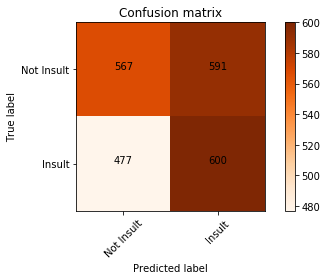

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1)) 

count_train = count_train.toarray()
count_test = count_test.toarray()

classifier(GaussianNB(),count_train, y_train,count_test,y_test)

## 1. Lemmatization

Accuracy score =  52.57 %
F1 score =  54.15 %


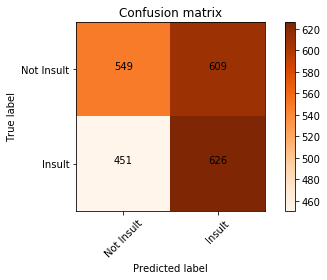

In [35]:
lemmatize(x_train)
lemmatize(x_test)

count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1)) 

count_train = count_train.toarray()
count_test = count_test.toarray()

classifier(GaussianNB(),count_train, y_train,count_test,y_test)

## 2. Stopwords

Accuracy score =  52.30 %
F1 score =  54.29 %


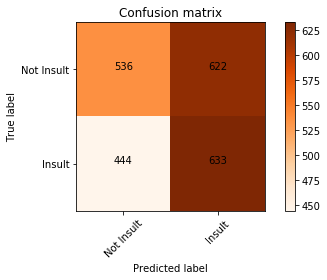

In [36]:
count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1,stop_words=stopwords)) 

count_train = count_train.toarray()
count_test = count_test.toarray()

classifier(GaussianNB(),count_train, y_train,count_test,y_test)

## 3. Bigrams

Accuracy score =  56.51 %
F1 score =  53.98 %


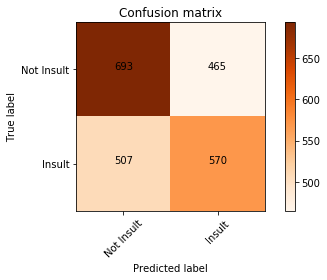

In [37]:
count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1,ngram_range=(2,2))) 

count_train = count_train.toarray()
count_test = count_test.toarray()

classifier(GaussianNB(),count_train, y_train,count_test,y_test)

## 4. Laplace Smoothing

Accuracy score =  68.28 %
F1 score =  62.70 %


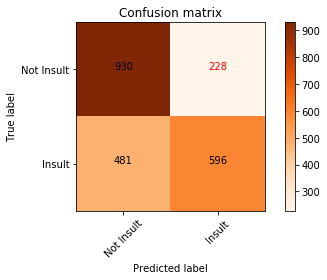

In [38]:
from sklearn.naive_bayes import MultinomialNB

count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer()) 

count_train = count_train.toarray()
count_test = count_test.toarray()
classifier(MultinomialNB(alpha=1),count_train, y_train,count_test,y_test)

## 5. Try all together

Accuracy score =  56.24 %
F1 score =  22.99 %


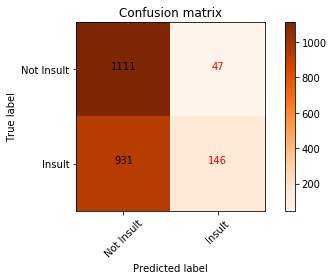

In [39]:
lemmatize(x_train)  
lemmatize(x_test)

count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1,ngram_range=(2,2),stop_words=stopwords))  

count_train = count_train.toarray()
count_test = count_test.toarray()

classifier(MultinomialNB(alpha=1),count_train, y_train,count_test,y_test)

## Advanced clean of data

In [40]:
lemmatize(x_train)  # 1st step to improve score - lemmatization
lemmatize(x_test)

stemWords(x_train)  # 4th step to improve score - stemming
stemWords(x_test)

FixWords(x_train)   # 6th step to improve score - fix words with many continueous letters, ex. heyyyyyyy
FixWords(x_test)

In [41]:
freq = pd.Series(' '.join(x_train).split()).value_counts()[:10] # 5th step to improve score - Common word removal
freq = list(freq.index)
x_train = x_train.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

freq = pd.Series(' '.join(x_test).split()).value_counts()[:10] # 5th step to improve score - Common word removal
freq = list(freq.index)
x_test = x_test.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [42]:
freq = pd.Series(' '.join(x_train).split()).value_counts()[-10:] # 5th step to improve score - Rare word removal
freq = list(freq.index)
x_train = x_train.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

freq = pd.Series(' '.join(x_test).split()).value_counts()[-10:] # 5th step to improve score - Rare word removal
freq = list(freq.index)
x_test = x_test.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

## Part-of-Speech 

In [16]:
def pos_tag(df,data):
    listOfpos = []  
    for text in data:
        textWords =  word_tokenize(text)
        listOfpos.append(nltk.pos_tag(textWords))

    nounlist = []
    verblist = []
    adverblist = []
    adjectivelist = []

    for list1 in listOfpos:   
        count=0 
        noun=0
        verb=0
        adverb=0
        adjective=0
        for tuple1 in list1:
            count+=1
            verb += tuple1.count('VBD')
            noun += tuple1.count('NN')
            adverb += tuple1.count('VBG')
            adjective  += tuple1.count('JJ') + tuple1.count('JJS')
        if(count>0):
            adverblist.append(adverb/count) # fractionAdverbs
            verblist.append(verb/count) # fractionVerbs
            adjectivelist.append(adjective/count) # fractionAdjectives
            nounlist.append(noun/count) # fractionNouns 
        else:
            adverblist.append(0) # fractionAdverbs
            verblist.append(0) # fractionVerbs
            adjectivelist.append(0) # fractionAdjectives
            nounlist.append(0) # fractionNouns 
    df['fractionNouns'] = nounlist      # add to the given df an extra column with the percentage of nouns
    df['fractionVerbs'] = verblist       # add to the given df an extra column with the percentage of verbss
    df['fractionAdverbs'] = adverblist       # add to the given df an extra column with the percentage of adverbss
    df['fractionAdjectives'] = adjectivelist    # add to the given df an extra column with the percentage of adjectives 

In [17]:
train_df = DataFrame(data=x_train)      # ctreate a dataframe of the train data
test_df  = DataFrame(data=x_test)       # ctreate a dataframe of the test data
pos_tag(train_df,x_train)
pos_tag(test_df,x_test)

In [18]:
train_df.head()

,Comment,fractionNouns,fractionVerbs,fractionAdverbs,fractionAdjectives
0,fuck your dad,0.333333,0.000000,0.0,0.000000
1,realli do understand your it seem that mix app...,0.300000,0.000000,0.0,0.000000
2,canadian can ha been wrong befor now will be s...,0.244444,0.000000,0.0,0.111111
3,listen if dont wan na get marri man or woman d...,0.255319,0.042553,0.0,0.127660
4,giang ta khi sau tranh con,1.000000,0.000000,0.0,0.000000


In [19]:
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_train,tfidf_test = vectorizeData(x_train,x_test,TfidfVectorizer(max_df=1.0, min_df=1,stop_words=stopwords)) 
# 2nd step to improve score - remove stopwords

tfidf_train = tfidf_train.toarray()     # make vectors to array, in order to concat them with the pos data
tfidf_test = tfidf_test.toarray()

In [20]:
nouns_train = train_df['fractionNouns']     # make every column of the pos features to a vertical array
nouns_test = test_df['fractionNouns']       # in order to concat all the features with the tfidf features

nouns_train = np.asarray(nouns_train)
nouns_train = np.vstack(nouns_train)
nouns_test = np.asarray(nouns_test)
nouns_test = np.vstack(nouns_test)

In [21]:
verbs_train = train_df['fractionVerbs']
verbs_test = test_df['fractionVerbs']

verbs_train = np.asarray(verbs_train)
verbs_train = np.vstack(verbs_train)
verbs_test = np.asarray(verbs_test)
verbs_test = np.vstack(verbs_test)

In [22]:
adverbs_train = train_df['fractionAdverbs']
adverbs_test = test_df['fractionAdverbs']

adverbs_train = np.asarray(adverbs_train)
adverbs_train = np.vstack(adverbs_train)
adverbs_test = np.asarray(adverbs_test)
adverbs_test = np.vstack(adverbs_test)

In [23]:
adjectives_train = train_df['fractionAdjectives']
adjectives_test = test_df['fractionAdjectives']

adjectives_train = np.asarray(adjectives_train)
adjectives_train = np.vstack(adjectives_train)
adjectives_test = np.asarray(adjectives_test)
adjectives_test = np.vstack(adjectives_test)

In [24]:
train_final = np.hstack((nouns_train,verbs_train,adverbs_train,adjectives_train,tfidf_train))   # merge all the arrays (nouns,verbs,adverbs,adjectives,tfidf festure)
test_final = np.hstack((nouns_test,verbs_test,adverbs_test,adjectives_test,tfidf_test))

X_train = sp.csr_matrix(train_final)        # transform the array into a sparse array
X_test = sp.csr_matrix(test_final)

In [62]:
statdf = DataFrame(columns=['Classifier','Vectorizer','Accuracy','F1 score'])

In [26]:
def addToStat(statdf,clf,x_train, y_train,x_test,y_test,vect,clf_name):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    train_accuracy = metrics.accuracy_score(y_test, y_pred)*100
    train_f1 = metrics.f1_score(y_test, y_pred)*100
    df2 = pd.DataFrame([[clf_name,vect,"{:.2f}".format(train_accuracy) + " %","{:.2f}".format(train_f1) + " %"]],columns=['Classifier','Vectorizer','Accuracy','F1 score'])
    statdf = statdf.append(df2,ignore_index=True)
    return statdf

--- 
# Random Forest Classifier
---

Accuracy score =  64.65 %
F1 score =  49.16 %


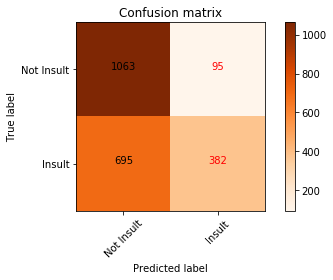

In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier(RandomForestClassifier(n_estimators=100,criterion='gini'),X_train,y_train,X_test,y_test) # 3rd step to improve score - fix parameters
statdf = addToStat(statdf,RandomForestClassifier(n_estimators=100,criterion='gini'),X_train,y_train,X_test,y_test,"PoS + Tf-Idf","RandomForestClassifier(n_estimators=100,criterion='gini')")

---
# Support Vector Machine (SVM)
---

Accuracy score =  68.64 %
F1 score =  57.02 %


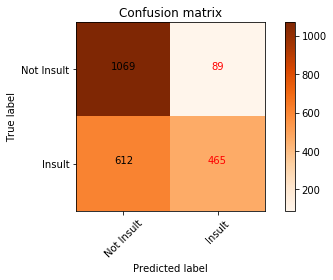

In [64]:
from sklearn import svm

classifier(svm.SVC(C=1,kernel='linear',gamma=1),X_train,y_train,X_test,y_test) # 3rd step to improve score - fix parameters

statdf = addToStat(statdf,svm.SVC(C=1,kernel='linear',gamma=1),X_train,y_train,X_test,y_test,"PoS + Tf-Idf","SVC(C=1,kernel='linear',gamma=1)")

# $\bullet$  Try different classifiers and features

In [65]:
tfidf_train,tfidf_test = vectorizeData(x_train,x_test,TfidfVectorizer(max_df=1.0, min_df=1,stop_words=stopwords)) 
count_train,count_test = vectorizeData(x_train,x_test,CountVectorizer(max_df=1.0, min_df=1))  
count_train = count_train.toarray()
count_test = count_test.toarray()

In [66]:
# Multinomial - count vectorizer - Best F1 score
statdf = addToStat(statdf,MultinomialNB(alpha=0.1),count_train, y_train,count_test,y_test,"BoW","MultinomialNB(alpha=0.1)")

In [67]:
# Random Forest - tfidf vectorizer
statdf = addToStat(statdf,RandomForestClassifier(n_estimators=100,criterion='gini'),tfidf_train,y_train,tfidf_test,y_test,"Tf-Idf","RandomForestClassifier(n_estimators=100,criterion='gini')")

In [68]:
# Random Forest - count vectorizer
statdf = addToStat(statdf,RandomForestClassifier(n_estimators=100,criterion='gini'),count_train,y_train,count_test,y_test,"BoW","RandomForestClassifier(n_estimators=100,criterion='gini')")

In [69]:
# SVM - tfidf vectorizer
statdf = addToStat(statdf,svm.SVC(C=1,kernel='linear',gamma=1),tfidf_train,y_train,tfidf_test,y_test,"Tf-Idf","SVC(C=1,kernel='linear',gamma=1)")

In [70]:
# SVM Forest - count vectorizer - Best accuracy score
statdf = addToStat(statdf,svm.SVC(C=1,kernel='linear',gamma=1),count_train,y_train,count_test,y_test,"BoW","SVC(C=1,kernel='linear',gamma=1)")

In [71]:
statdf

,Classifier,Vectorizer,Accuracy,F1 score
0,"RandomForestClassifier(n_estimators=100,criter...",PoS + Tf-Idf,64.56 %,49.10 %
1,"SVC(C=1,kernel='linear',gamma=1)",PoS + Tf-Idf,68.64 %,57.02 %
2,MultinomialNB(alpha=0.1),BoW,67.70 %,62.86 %
3,"RandomForestClassifier(n_estimators=100,criter...",Tf-Idf,67.07 %,53.24 %
4,"RandomForestClassifier(n_estimators=100,criter...",BoW,66.04 %,50.49 %
5,"SVC(C=1,kernel='linear',gamma=1)",Tf-Idf,68.46 %,56.29 %
6,"SVC(C=1,kernel='linear',gamma=1)",BoW,68.86 %,59.35 %


## Wordcloud of insulting comments

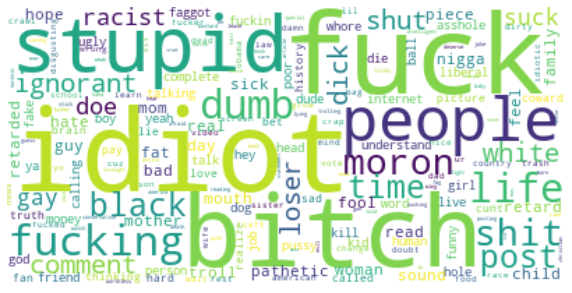

In [38]:
import collections
generate_WordCloud(ins_tempdf['Comment'],stopwords)

## Wordcloud of not insulting comments

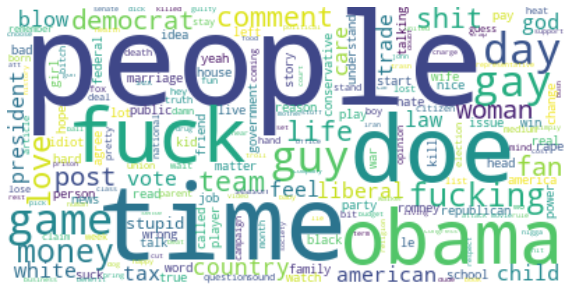

In [39]:
generate_WordCloud(notins_tempdf['Comment'],stopwords)

### From these wordclouds, we can easily understand that not insulting comments ( with 0), can contain some bad words such as "stupid", "fucking". So this might be the reason why achieving high scores is difficult.